In [1]:
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
import time
from lxml import html
import html5lib
import random
import matplotlib.pyplot as plt

In [5]:
#### PART 1 ####

requests.get('https://ies-midterm.soulution.rocks/').status_code

403

In [6]:
payload = '{"cuni":"95580811"}'
r = requests.post('https://ies-midterm.soulution.rocks/login', payload)

In [7]:
r

<Response [200]>

In [8]:
data = json.loads(r.text)

In [9]:
data

{'data': {'personal_code': '7b3547b8',
  'dataset_ids': ['f894683be9',
   '81395feb08',
   '098b83ee51',
   '8a310226b3',
   '3bd4cabfaa',
   '5aa21103e8']},
 'message': 'Hello, Asadli Rufat! Good luck with the midterm. GET your data set from /data/file_id endpoint; use the codes you received in the data response as the file_id parameter! Print the personal code in your notebook.'}

In [10]:
data['message']

'Hello, Asadli Rufat! Good luck with the midterm. GET your data set from /data/file_id endpoint; use the codes you received in the data response as the file_id parameter! Print the personal code in your notebook.'

In [11]:
data['data']['personal_code']

'7b3547b8'

In [19]:
my_codes = data['data']['dataset_ids']
my_codes

['f894683be9',
 '81395feb08',
 '098b83ee51',
 '8a310226b3',
 '3bd4cabfaa',
 '5aa21103e8']

In [120]:
placeholder = {}
for file_id in my_codes:
    r = requests.get(url=f'https://ies-midterm.soulution.rocks/data/{file_id}')
    while r.status_code !=200:  
        r=requests.get(url=f'https://ies-midterm.soulution.rocks/data/{file_id}')
        time.sleep(0.5)
    DD=r.json()['data']
    
    ticker = DD['company']
    data = pd.DataFrame(d['data']).set_index('Date')
    data.index = pd.to_datetime(data.index)
    
    placeholder[ticker] = data
    
df = pd.concat(placeholder)    

#we send a request with all our codes, we add a while clause for the cases when the get request does not back with code 200. 
#We convert data to json, then set index date, change it to real date with pd.to_datetime.
#We also have a placeholder to fill the indexes with data
#We concatenate all placeholders.
#We do not forget to stick to numeric data type.

In [121]:
df.index.names = ['Tickers','Date']
df.columns
df.dropna(how='all',inplace = True)

In [122]:
df = df.apply(lambda x: pd.to_numeric(x))
df

Open         High          Low        Close  \
Tickers Date                                                             
RTO     2020-01-24  1865.000000  1865.000000  1865.000000  1865.000000   
CCH     2019-01-02     9.650000     9.650000     9.640000     9.650000   
        2019-01-03     9.630000     9.630000     9.630000     9.630000   
        2019-01-04     9.640000     9.640000     9.640000     9.640000   
        2019-01-07     9.640000     9.640000     9.640000     9.640000   
...                         ...          ...          ...          ...   
BME     2020-11-16    46.750000    47.099998    46.360001    46.650002   
        2020-11-17    46.689999    47.000000    46.369999    46.599998   
        2020-11-18    46.900002    47.049999    46.009998    46.240002   
        2020-11-19    46.049999    46.230000    45.689999    46.000000   
        2020-11-20    45.910000    46.660000    45.500000    45.700001   

                      Adj.Close  Volume  
Tickers Date                             
RTO     2020-01-24  1865.000000       0  
CCH     2019-01-02     9.623075     500  
        2019-01-03     9.603131    1700  
        2019-01-04     9.613103    1500  
        2019-01-07     9.613103    1000  
...                         ...     ...  
BME     2020-11-16    46.650002   51300  
        2020-11-17    46.599998   43900  
        2020-11-18    46.240002   49500  
        2020-11-19    46.000000   24600  
        2020-11-20    45.700001   25400  

[2391 rows x 6 columns]

In [115]:
####  PART 2 ####

df.reset_index("Date")['Date'].groupby('Tickers').max()

Tickers
AUTO   2020-11-20
BME    2020-11-20
CCH    2020-11-20
DGE    2020-11-20
MRO    2020-11-20
RTO    2020-01-24
Name: Date, dtype: datetime64[ns]

In [116]:
df.reset_index("Date")['Date'].groupby('Tickers').min()

Tickers
AUTO   2019-01-02
BME    2019-01-02
CCH    2019-01-02
DGE    2019-01-02
MRO    2019-01-02
RTO    2020-01-24
Name: Date, dtype: datetime64[ns]

In [117]:
df.groupby('Tickers')["Adj.Close"].min()

Tickers
RTO     1865.000000
CCH        9.603131
MRO        3.102920
DGE      709.190002
AUTO       0.670000
BME       26.664894
Name: Adj.Close, dtype: float64

In [111]:
df.groupby('Ticker')['Adj.Close'].max()

Ticker
RTO     1865.000000
CCH       19.389999
MRO       18.377321
DGE     1045.109985
AUTO       5.370000
BME       46.650002
Name: Adj.Close, dtype: float64

In [48]:
df.groupby('Tickers')['Volume'].idxmax()

Ticker
RTO      (RTO, 2020-01-24 00:00:00)
CCH      (CCH, 2020-06-05 00:00:00)
MRO      (MRO, 2020-05-29 00:00:00)
DGE      (DGE, 2019-01-02 00:00:00)
AUTO    (AUTO, 2020-08-27 00:00:00)
BME      (BME, 2020-03-23 00:00:00)
Name: Volume, dtype: object

In [49]:
df.groupby('Tickers')['Volume'].sum()

Ticker
RTO               0
CCH       161040023
MRO     10103549800
DGE               0
AUTO       95550500
BME        18166500
Name: Volume, dtype: int64

<AxesSubplot:xlabel='Date'>

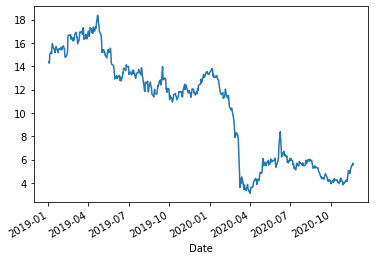

In [53]:
df.loc['MRO',:]['Adj.Close'].plot()

In [100]:
data2 = df[['Open', 'Close']]
import numpy as np
difference = data2.loc[:, 'Open'] - data2.loc[:, 'Close']
maximums = difference.groupby("Tickers").max()
difference.groupby("Tickers").idxmax()
##### DGE, on 2020-03-16 #####

Ticker
RTO      (RTO, 2020-01-24 00:00:00)
CCH      (CCH, 2020-09-02 00:00:00)
MRO      (MRO, 2019-09-17 00:00:00)
DGE      (DGE, 2020-03-16 00:00:00)
AUTO    (AUTO, 2020-11-06 00:00:00)
BME      (BME, 2020-03-12 00:00:00)
dtype: object

<AxesSubplot:xlabel='Ticker'>

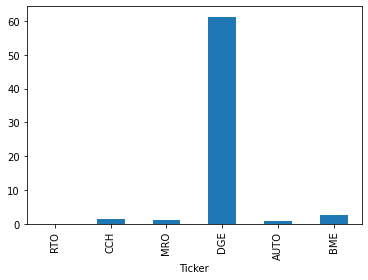

In [88]:
maximums.plot(kind = 'bar')

In [101]:
df.groupby('Ticker')

In [89]:
data3 = df['Adj.Close']

<AxesSubplot:xlabel='Date'>

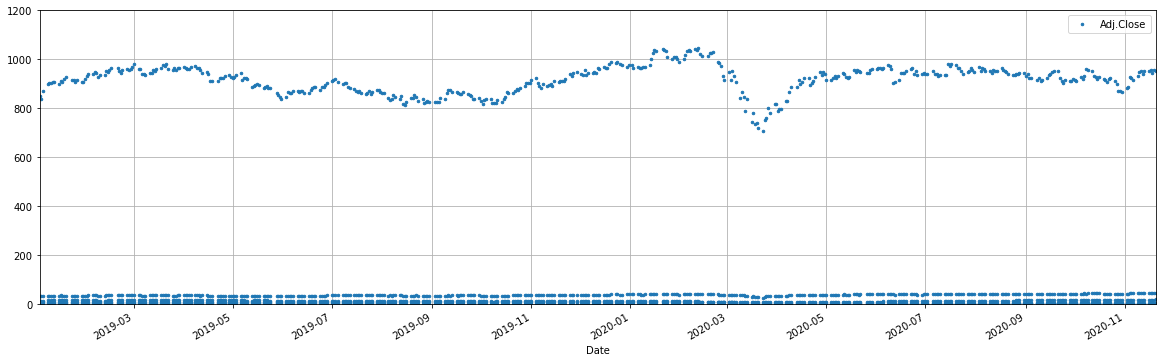

In [137]:
plotconfig = {'style': '.',
 'ylim': (0, 1200),
 'xlim': ('2019-01-02', '2020-11-20'),
 'grid': True,
 'markersize': 5,
 'figsize': (20, 6)}

data3.reset_index('Date').plot(x = 'Date', y = 'Adj.Close', **plotconfig)